Categorical Variable Regression

In [22]:
import pandas as pd
f1=pd.read_csv(r'C:\Users\mhaasa\Desktop\Patients_Analysis.csv')
print(f1)

   Check up call  Months Since last Check up Type of Check Up  Check up time
0              1                           2           Normal            2.9
1              2                           6       Diagnostic            3.0
2              3                           8           Normal            4.8
3              4                           3       Diagnostic            1.8
4              5                           2           Normal            2.9


In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as s
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from sklearn import linear_model



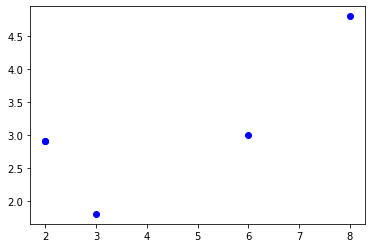

In [25]:
x1=f1['Months Since last Check up']
y=f1['Check up time']
x2=f1['Type of Check Up']
plt.scatter(x1,y,color='b')

In [26]:
x1=s.add_constant(x1)
model1=s.OLS(y,x1).fit()
model1.summary() #simple linear regression for x1,y

C:\Users\mhaasa\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Check up time   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     3.906
Date:                Sun, 07 Feb 2021   Prob (F-statistic):              0.143
Time:                        17:54:51   Log-Likelihood:                -4.8384
No. Observations:                   5   AIC:                             13.68
Df Residuals:                       3   BIC:                             12.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.8083      0.741      2.440      0.092      -0.550       4.167
Months Since last Check up     0.3028      0.153      1.976      0.143      -0.185       0.790
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.372
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                          -0.465   Prob(JB):                        0.678
Kurtosis:                       1.308   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
influence=model1.get_influence()
res=influence.resid_studentized_external
res

array([ 0.67245549, -0.88235294,  1.51851852, -1.57142857,  0.67245549])

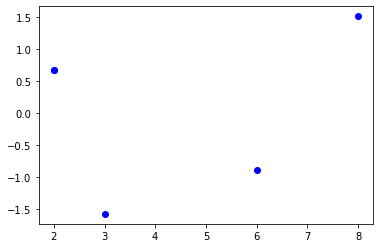

In [30]:
plt.scatter(f1['Months Since last Check up'],res,color='b')

In [ ]:
# for x1 alone 90% of defects are between -1.5,1.5

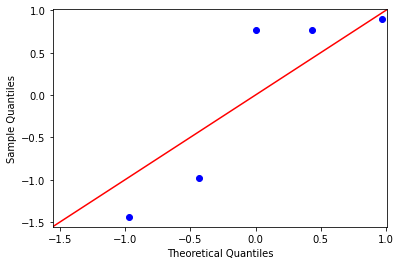

In [31]:
resid=model1.resid
plot_prob=s.ProbPlot(resid,stats.norm,fit=True)
fig=plot_prob.qqplot(line='45')


In [ ]:
# since most of the points are away from 45 deg line that means there is some other variable affecting the dependent variable

In [32]:
dummy1=pd.get_dummies(f1['Type of Check Up'])
dummy1 # 1=presence of normal prob ,0=absence of normal prob

,Diagnostic,Normal
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [35]:
dummy2=pd.concat([f1,dummy1],axis=1)
dummy2.drop(['Type of Check Up','Normal'],inplace=True,axis=1)
dummy2

,Check up call,Months Since last Check up,Check up time,Diagnostic
0,1,2,2.9,0
1,2,6,3.0,1
2,3,8,4.8,0
3,4,3,1.8,1
4,5,2,2.9,0


In [37]:
model2=s.OLS(dummy2['Check up time'],s.add_constant(dummy2[['Months Since last Check up','Diagnostic']])).fit()
model2.summary() #categorical regression including continous , categorical Data

C:\Users\mhaasa\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Check up time   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):            0.00564
Time:                        21:33:33   Log-Likelihood:                 6.0229
No. Observations:                   5   AIC:                            -6.046
Df Residuals:                       2   BIC:                            -7.217
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.2140      0.109     20.405      0.002       1.747       2.681
Months Since last Check up     0.3298      0.021     15.350      0.004       0.237       0.422
Diagnostic                    -1.2982      0.105    -12.333      0.007      -1.751      -0.845
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.947
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.285
Skew:                          -0.057   Prob(JB):                        0.867
Kurtosis:                       1.835   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

##Check up time for Diagnostic requires average(mean) of -1.2982 hours less than Normal problems